In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
import pylab as pl
%pylab inline
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


# Task1

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but unfortunately technical errors have resulted in some exact duplicate records. You know there are around 1,000 unique stops in the file (there may be slightly more or slightly fewer

a) Use a clustering technique of your choice to determine how many unique records there are.

b) Check your work by looking for row­wise duplicates using any technique of your choice (this should be straightforward). How well did your clustering technique perform?

c) Write a paragraph explaining what you did in parts a) and b)

#### (a)

In [3]:
df = pd.read_csv('original_with_duplicates_noid.csv')
df.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6
3,2011,False,False,False,black,23,medium,male,5.916667,180,...,False,False,False,True,False,False,False,Friday,April,1
4,2011,False,False,False,black,33,thin,male,5.666667,175,...,False,False,False,False,False,False,False,Thursday,December,4


In [4]:
boolcol = list(df.columns[list(df.dtypes == 'bool')])
objectcol = list(df.columns[list(df.dtypes == 'object')])

In [5]:
a = pd.get_dummies(df, prefix=None, columns=boolcol+objectcol)

In [21]:
db = DBSCAN(eps=0.01, min_samples=1).fit_predict(a)
len(np.unique(db))

997

#### (b)

In [7]:
len(df.drop_duplicates())

997

#### (c)

#### In part (a), first, I convert all bool or object type coloums into unique number. Then I use DBscan to cluster all the records to detect duplicate rows. The reason why I use DBscan is DBscan can detect the number of clusters automaticaly. When I set min samples to one and eps to very small number, it can cluster the same rows. 

#### In part (b), I use command drop_duplicate in pandas to drop same rows.

#### The results from each part turn out to be the same, which proves that DBscan do a perfect job to detect duplication.

# Task 2 

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but unfortunately technical errors have resulted in some almost­duplicate records (that is, there are some records that are duplicates of others except for slight variations in two features). You know there are around 1,000 u nique stops in the file (there may be slightly more or slightly fewer).

a) Use a clustering technique of your choice to determine how many unique records you think there should be.

b) Which are the two features where errors were introduced?

c) Write a paragraph explaining what you did in parts a) and b)

#### (a)

In [89]:
df = pd.read_csv('original_with_errors_noid.csv')
df.head()

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4
3,2012,False,False,False,native.american,14,thin,male,5.500000,140,...,False,True,True,False,False,False,False,Tuesday,October,4
4,2012,False,False,False,hispanic,21,medium,male,5.750000,145,...,True,True,True,True,False,False,False,Tuesday,June,5


In [90]:
boolcol = list(df.columns[list(df.dtypes == 'bool')])
objectcol = list(df.columns[list(df.dtypes == 'object')])

a = pd.get_dummies(df, prefix=None, columns=boolcol+objectcol)

In [93]:
cols = a.columns
minimum = 1100

for i in cols:
    for j in cols:       
        col = []
        for k in cols:
            if ((k!=i)and(k!=j)):
                col.append(k)
        
        db = DBSCAN(min_samples=1, eps=1)
        if max(db.fit_predict(a[col])) < minimum:
            minimum = max(db.fit_predict(a[col]))
            col_a = i
            col_b = j

print (minimum)

996


#### (b)

In [106]:
print col_a
print col_b

suspect.age
suspect.weight


#### (c)

#### As the result, there should be 996 unique records, and the columns with errors should be suspect.age and suspect.weight.

#### In this case, I still use the same method, DBscan, with task 1. The difference is I try DBscan several times, and in each time, I exclude two features. I compare the cluster amount of each DBscan result, and find the minimum one. Since I use same parameter on DBscan each time, so the one geting the minimum cluster amount should be the best one, and the features excluded on that time should be the features with errors.

# Task 3

You are given records for all recorded CPW stops made in New York City during 2012 in the file ‘cpw_stops_2012.csv’. Each record includes the lat/long of the stop and the month, day, and time period (this feature has six values, where each corresponds to a four­hour time period. For example, time.period = 1 means the stop occurred between midnight and 4am, and time.period = 2 means the stop occurred between 4am and 8am). Explore “hot­spots” of CPW stops by applying clustering methods based on space, or space and time. In particular,

a) Apply at least two different clustering algorithms to the data

b) Plot some clusters on a map of New York City

c) Write at least two paragraphs explaining which clustering methods you chose
and the parameters you used (and why you used those parameters). Do your results make sense? [ This question is deliberately open­ended. You will be evaluated on whether or not you made an effort to understand the data, successfully applied different clustering algorithms, and made at least one plot]

In [52]:
df = pd.read_csv('cpw_stops_2012.csv')
df.head()

,day,month,time.period,lat,lon
0,Thursday,January,6,40.829234,-73.875506
1,Saturday,January,1,40.812185,-73.938034
2,Sunday,January,1,40.840865,-73.885549
3,Sunday,January,1,40.577244,-74.000032
4,Tuesday,January,5,40.834126,-73.916660


In [55]:
a = pd.get_dummies(df, ['day','month'])
a.head()

,time.period,lat,lon,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,6,40.829234,-73.875506,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,40.812185,-73.938034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,40.840865,-73.885549,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,40.577244,-74.000032,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,40.834126,-73.916660,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-74.3, -73.7)

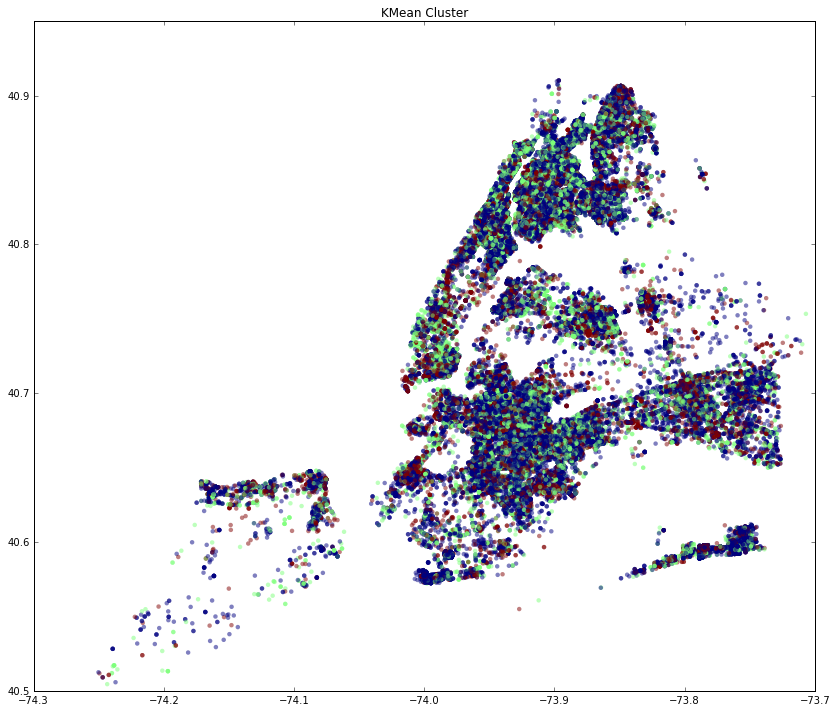

In [88]:
# KMeans Cluster

km = KMeans(n_clusters=3).fit_predict(a)

# Plot

fig = pl.figure(figsize = (14,12)) 

pl.scatter(df['lon'], df['lat'], c = km, s = 20, alpha=0.5, cmap = 'jet', linewidths = 0)
pl.title('KMean Cluster')
pl.ylim([40.5, 40.95])
pl.xlim([-74.3, -73.7])

(-74.3, -73.7)

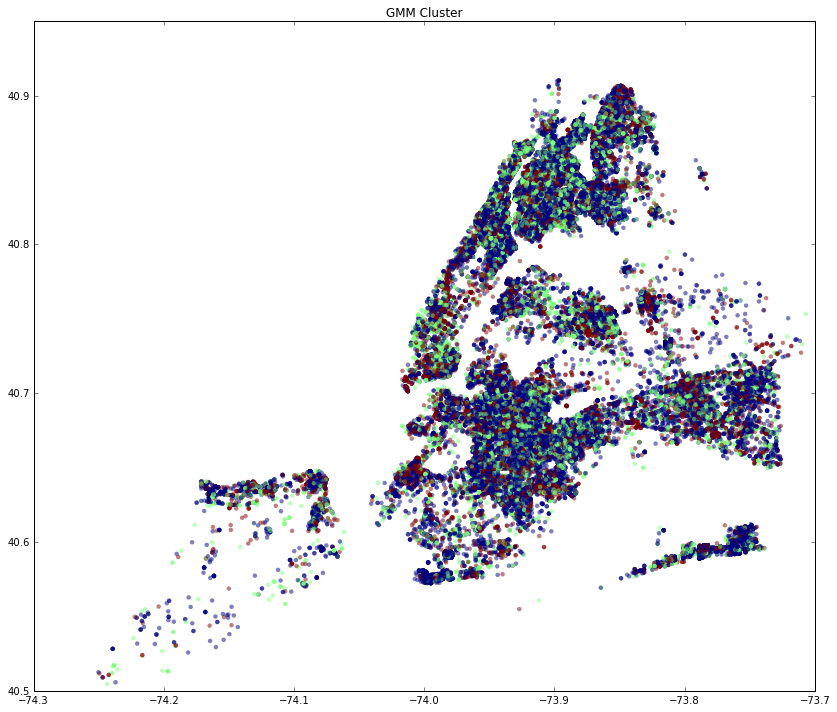

In [82]:
# GMM cluster

gmm = GMM(n_components=3).fit_predict(a)

# Plot

fig = pl.figure(figsize = (14,12)) 

pl.scatter(df['lon'], df['lat'], c = km, s = 20, alpha=0.5, cmap = 'jet', linewidths = 0)
pl.title('GMM Cluster')
pl.ylim([40.5, 40.95])
pl.xlim([-74.3, -73.7])

#### I choose Kmeans and GMM to cluster the data since other cluster methods seems can't work for this case. I set number of cluster equal to 3 since more clusters will make it more difficult to observe the results. 

#### The results from these two methods looks similar. Form the plots, the clusters's distributions seem random. But in Manhattan part, I can tell that, the stops between uptown, midtown and downtown belong to differnt classes. 